In [59]:
import sys
import os
sys.path.append('/home/saugatn3/miniconda3/envs/myenv/fashion-mnist')

In [60]:
import numpy as np
import pandas as pd
from utils import mnist_reader
import matplotlib.pyplot as plt

In [61]:
X_train, y_train = mnist_reader.load_mnist('/home/saugatn3/miniconda3/envs/myenv/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/home/saugatn3/miniconda3/envs/myenv/fashion-mnist/data/fashion', kind='t10k')

In [84]:
num = 200

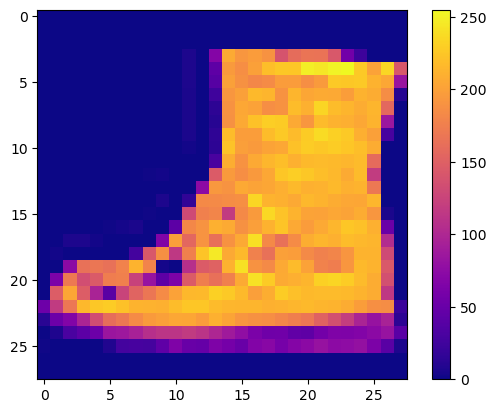

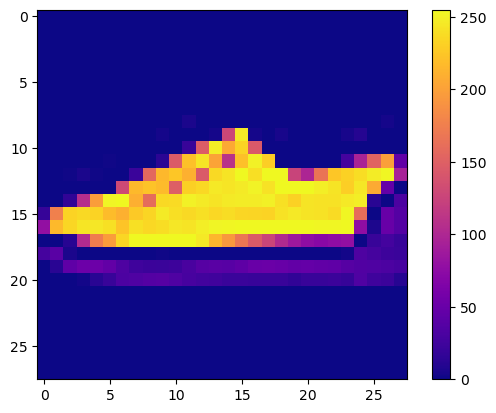

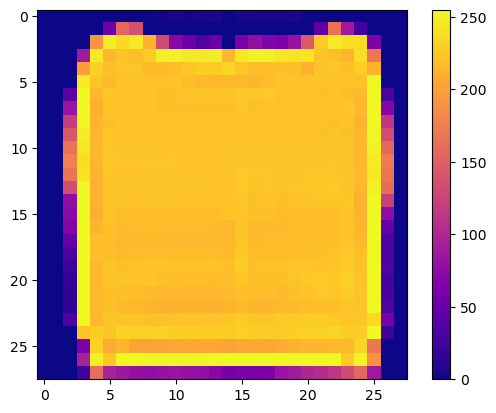

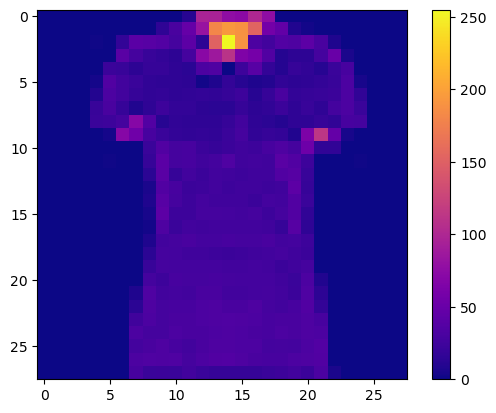

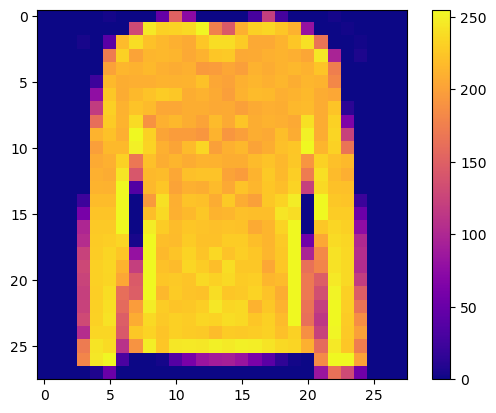

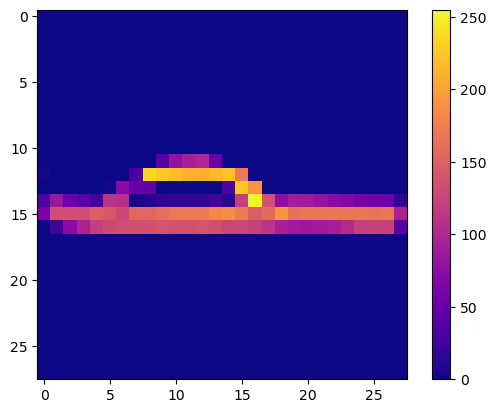

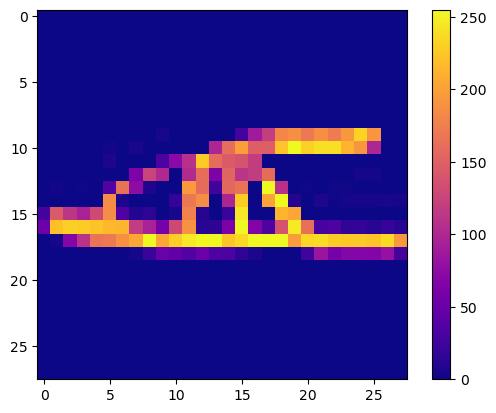

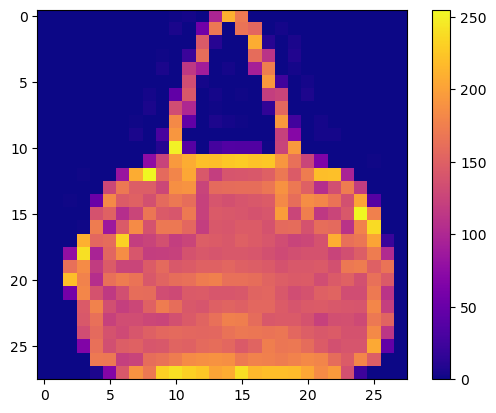

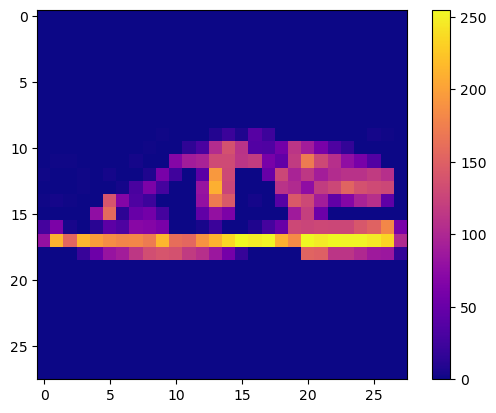

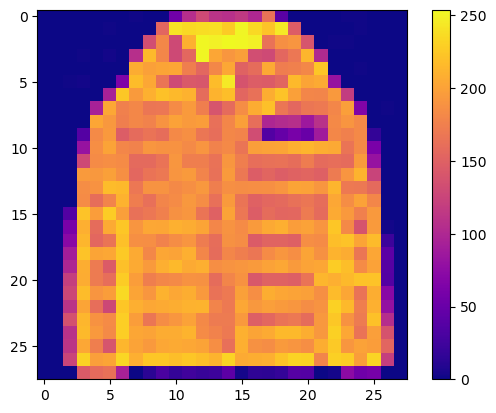

In [62]:
# Generate a 10x10 random grayscale image (values between 0 and 255)
# image = np.random.randint(0, 256, (10, 10), dtype=np.uint8)
randomimages = np.random.randint(0,60000,(10))
for number in randomimages:
    image = X_train[number]
    image = image.reshape((28,28))
    # Plot the image
    plt.imshow(image, cmap='plasma')
    plt.colorbar()  # To show the color bar which indicates the grayscale values
    plt.show()

In [63]:
df = pd.DataFrame(X_train)
meanimage = df.mean()
stimage = df.std()

In [64]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


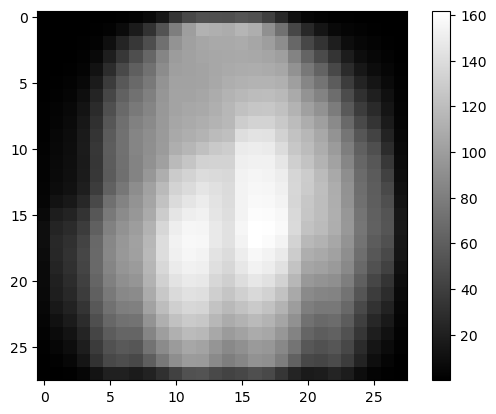

In [65]:
# Plot the image
imagearrya = np.array(meanimage)
imagearrya = imagearrya.reshape(28,28)
plt.imshow(imagearrya, cmap='gray')
plt.colorbar()  # To show the color bar which indicates the grayscale values
plt.show()

In [66]:
meandf = df-meanimage
stddf = meandf / stimage
covariance = stddf.cov()


In [67]:
eigenvalue , eigenvec = np.linalg.eig(covariance)
len(eigenvalue)

784

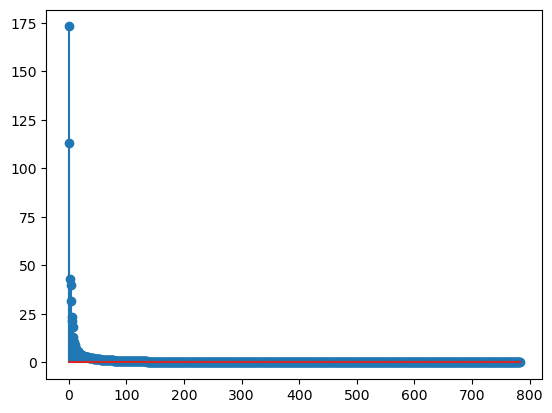

0.9320165769475914


In [68]:
plt.stem(eigenvalue)
plt.show()
total_sum = 0
sum = 0
for i in range(0,len(eigenvalue)):
    total_sum = total_sum + eigenvalue[i]
for i in range(0,200):
    sum = sum + eigenvalue[i]
print(sum/total_sum)


In [69]:
allclasses = [0,1,2,3,4,5,6,7,8,9]
classes = {0:"T-shirt/top",
1:	"Trouser",
2:	"Pullover",
3:	"Dress",
4:	"Coat",
5:	"Sandal",
6:	"Shirt",
7:	"Sneaker",
8:	"Bag",
9:	"Ankle boot"}

In [85]:
_pcas = []
y_class = []
for i in y_train:
    y_class.append(classes.get(i))
mpcas = np.matmul(stddf,eigenvec[:,:num])
#for i in range(0,10):
#    _pcas.append(stddf.dot(eigenvec.T[i]))
#pcas = np.array(_pcas)
#pcas = pd.DataFrame(_pcas).T
mpcas

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.801168,-20.866575,12.945028,3.311404,-6.638628,1.052818,-0.103100,-5.388786,3.998805,-2.178378,...,0.368229,-0.811728,0.042277,0.759773,-0.562643,0.387158,-0.293484,0.460332,0.083129,0.659358
1,17.074064,4.968471,2.077802,5.894986,11.006755,4.803549,-11.846715,1.595977,2.131116,2.342766,...,-1.124662,-1.043253,0.869912,-0.615933,0.010292,-0.142523,-1.832682,1.611567,-0.745100,-0.016656
2,-9.601561,12.295998,-1.082275,2.580104,0.233064,-0.981045,1.219406,-1.124071,0.818479,0.131102,...,-0.067937,0.091697,0.255356,0.085629,0.016428,0.055046,0.001424,0.108677,0.057790,0.039501
3,-0.311204,11.576669,-3.223850,4.267837,2.366083,0.578033,-2.116600,-0.658567,0.804138,-2.684294,...,-0.535922,0.267107,-0.507951,0.371153,0.249997,-0.796295,0.253168,-0.237861,0.085605,0.495810
4,8.963759,12.867631,10.208777,-2.650542,-0.611271,3.657550,3.112987,0.510473,1.683219,0.392195,...,-0.445679,-0.489591,-0.533463,-0.360449,0.052778,0.161203,-0.184891,0.713024,-0.237078,0.770908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-21.235463,-0.698244,-5.049072,9.494851,0.653948,-1.172837,2.807959,-4.164742,-1.446860,3.023738,...,0.138893,1.036999,0.717235,-0.663413,0.480775,-1.195293,-0.156144,-0.335074,-0.919635,-0.440931
59996,-0.780758,15.684310,8.217462,-1.691645,-1.787975,-8.440262,5.016556,1.967105,0.415784,-2.328277,...,-0.072341,-0.110482,-0.002846,0.175445,-0.133481,0.057135,-0.184079,-0.180198,0.026366,0.302147
59997,9.377586,13.105749,8.838224,-3.573100,-0.598449,0.317863,1.178781,0.071968,-1.491946,3.738718,...,0.225296,-0.270644,0.756023,0.680056,-0.285244,-0.002748,0.398214,-0.767339,0.586949,0.467977
59998,-9.645556,7.095228,-6.945277,4.449041,5.977873,-0.005333,-1.573993,-1.471706,2.306723,1.280090,...,0.203217,-0.197154,-0.197665,0.530872,-0.058245,0.370260,0.197746,-0.521421,-0.075270,-0.206306


In [86]:
reconstructed_data = np.matmul(mpcas,eigenvec[:,:num].T) * stimage + meanimage
reconstructed_data = np.array (reconstructed_data)

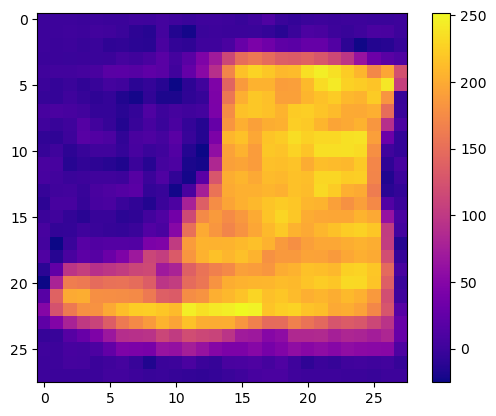

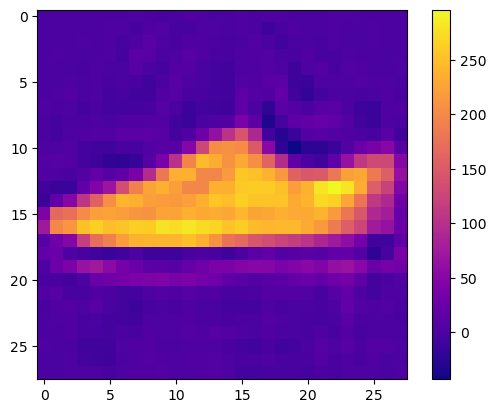

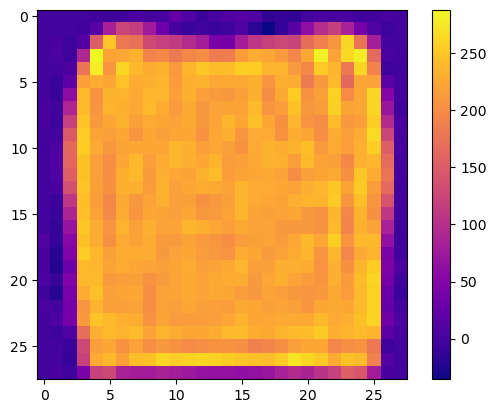

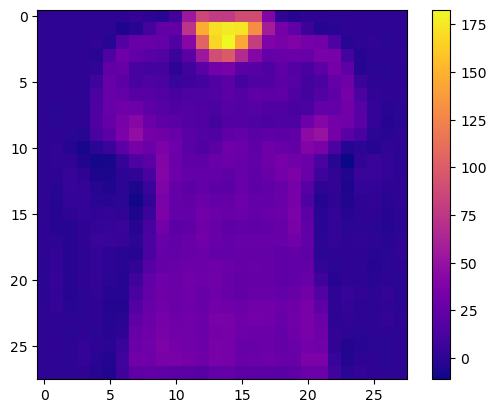

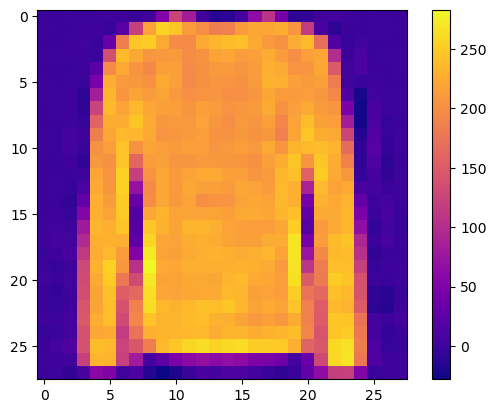

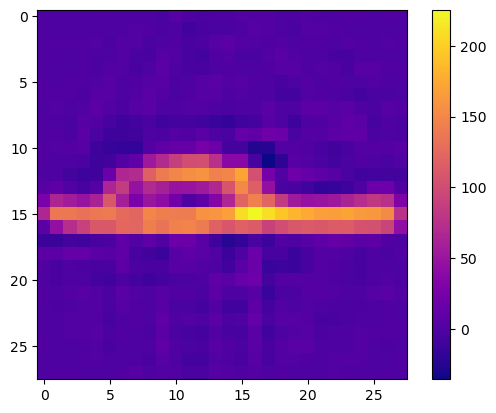

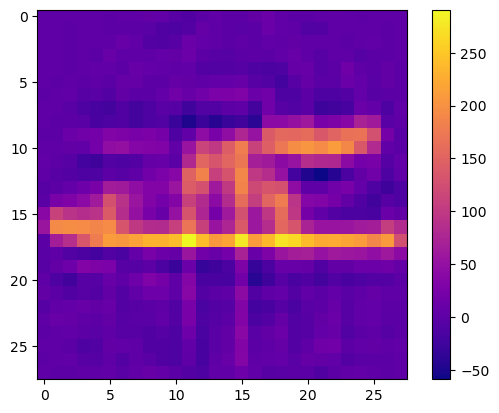

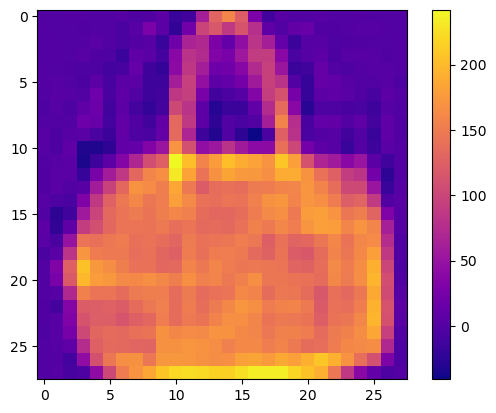

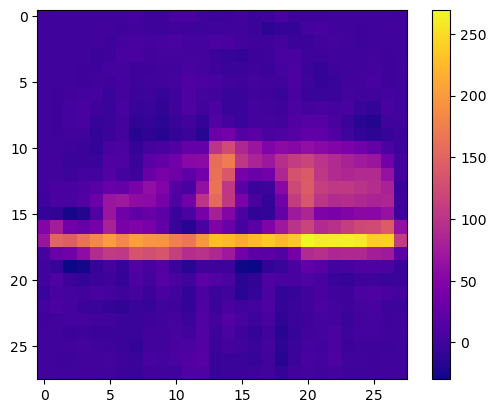

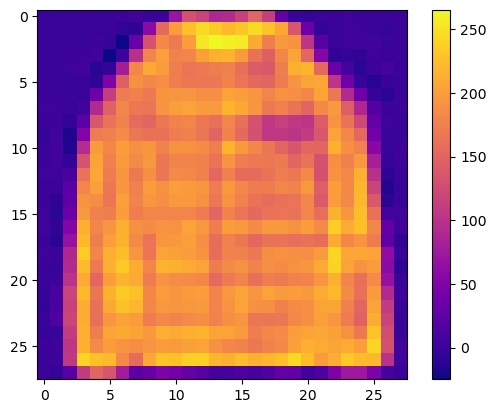

In [87]:
for number in randomimages:
    image = reconstructed_data[number]
    image = image.reshape((28,28))
    # Plot the image
    plt.imshow(image, cmap='plasma')
    plt.colorbar()  # To show the color bar which indicates the grayscale values
    plt.show()